In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('ml_project1_data.csv')
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [6]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
df.groupby('Education')['Income'].mean().round(0)

Education
2n Cycle      47633.0
Basic         20306.0
Graduation    52720.0
Master        52918.0
PhD           56145.0
Name: Income, dtype: float64

##### Getting rid of null values in the Income column

In [9]:
def new_income(income):
    Income=income[0]
    education=income[1]
    if pd.isnull(Income):
        if education=='2n Cycle':
            return 47633.0
        elif education=='Basic':
            return 20306.0
        elif education=='Graduation':
            return 52720.0
        elif education=='Master':
            return 52918.0
        elif education=='PhD':
            return 56145.0
    else:
        return Income

In [10]:
df['Income']=df[['Income','Education']].apply(new_income,axis=1)

In [11]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### People of what marital status have ordered the most?

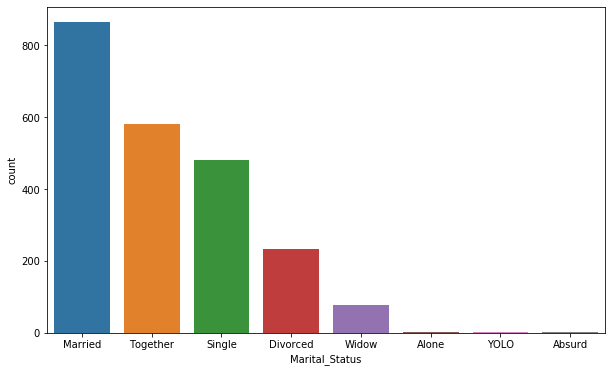

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(df['Marital_Status'], order = df['Marital_Status'].value_counts().index)

  Married, Together, and Single people have ordered the most

In [13]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 864x720 with 0 Axes>

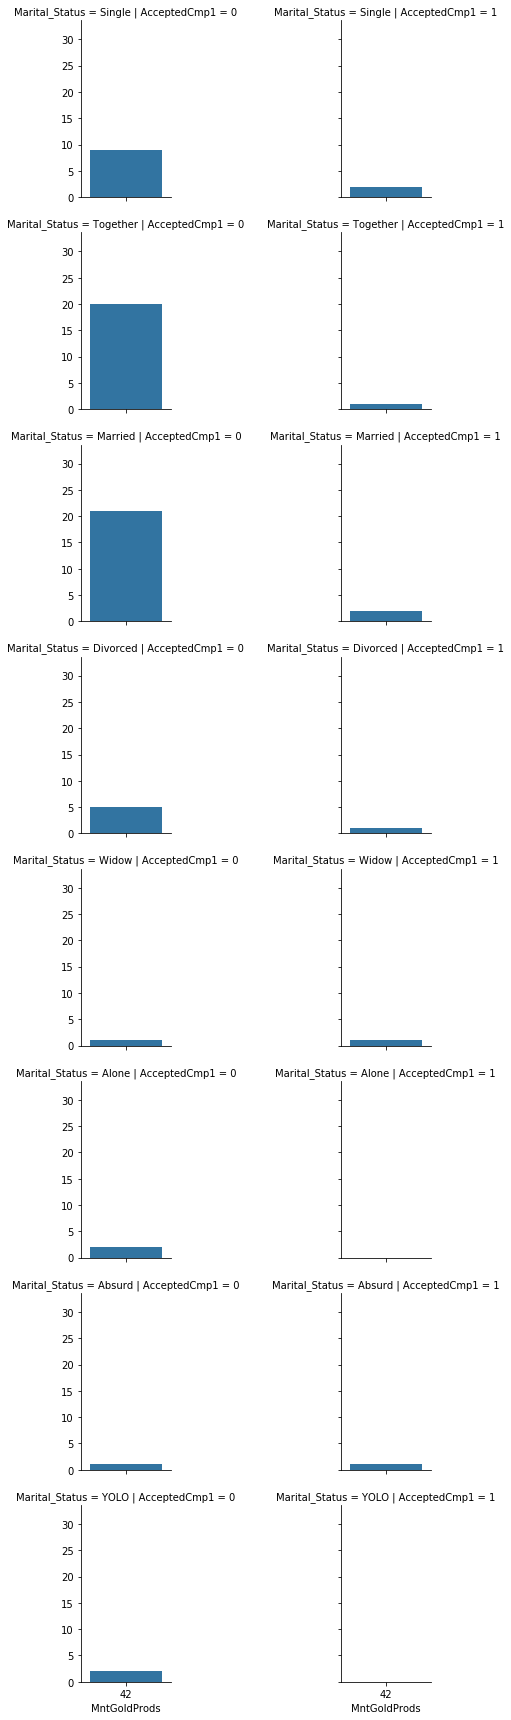

In [14]:
plt.figure(figsize=(12,10))
g=sns.FacetGrid(data=df, row='Marital_Status', col='AcceptedCmp1')
g.map(sns.countplot, 'MntGoldProds')
plt.subplots_adjust(hspace=0.2, wspace=1.9)


### Who accepted the offers in Campaign 1?

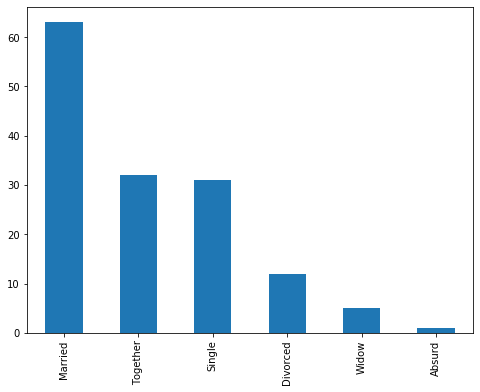

In [15]:
df[df['AcceptedCmp1']==1]['Marital_Status'].value_counts().plot(kind='bar',figsize=(8,6))

'Married people' have accepted the most offers in the 1st campaign

### Who accepted the offers in Campaign 2?

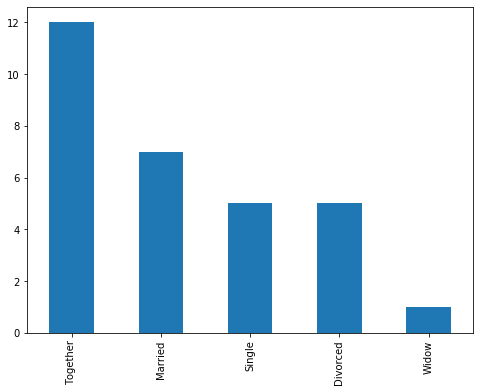

In [16]:
df[df['AcceptedCmp2']==1]['Marital_Status'].value_counts().plot(kind='bar',figsize=(8,6))

'Together people' have accepted the most offers in the 2nd campaign

### Who accepted the offers in Campaign 3?

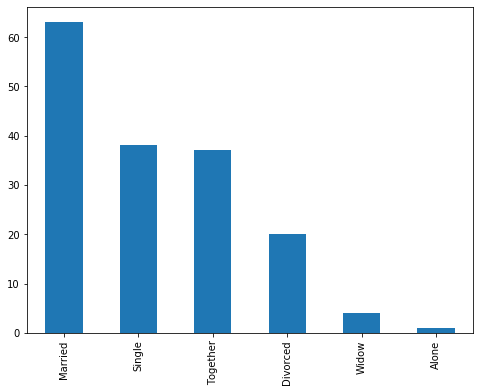

In [17]:
df[df['AcceptedCmp3']==1]['Marital_Status'].value_counts().plot(kind='bar',figsize=(8,6))

### Who accepted the offers in Campaign 4?

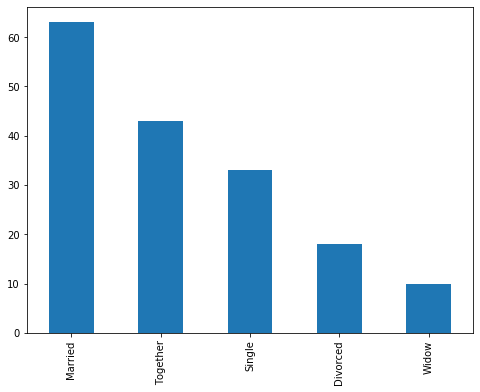

In [18]:
df[df['AcceptedCmp4']==1]['Marital_Status'].value_counts().plot(kind='bar',figsize=(8,6))

### Who accepted the offers in Campaign 5?

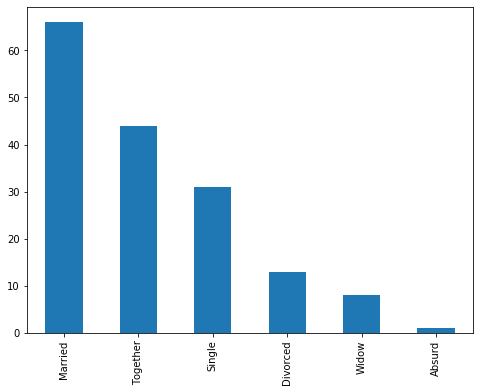

In [19]:
df[df['AcceptedCmp5']==1]['Marital_Status'].value_counts().plot(kind='bar',figsize=(8,6))

### Who accepted the offers in the last Campaign?

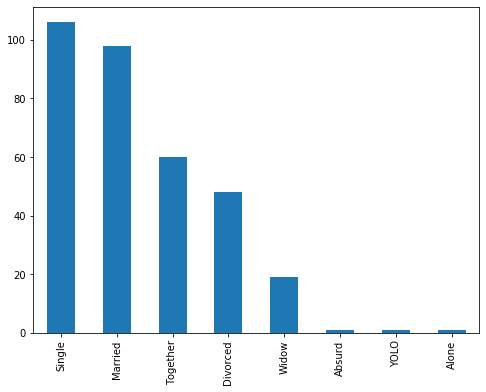

In [20]:
df[df['Response']==1]['Marital_Status'].value_counts().plot(kind='bar',figsize=(8,6))

##### The Last Campaign worked really well for the Single people alongside Married and together people.

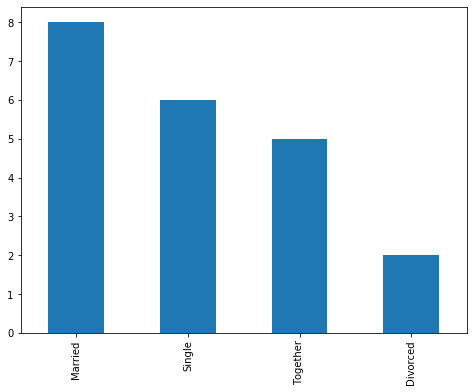

In [21]:
df[df['Complain']==1]['Marital_Status'].value_counts().plot(kind='bar',figsize=(8,6))

##### The Number of complaints have nothing to do with the placing of the orders

### People born in what top 10 years order the most?

In [22]:
df['Year_Birth'].value_counts().head(10)

1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
Name: Year_Birth, dtype: int64

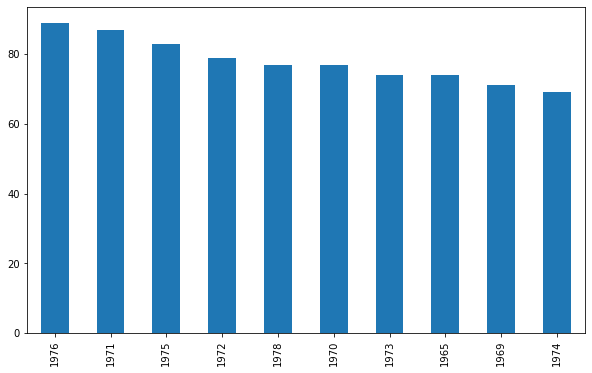

In [23]:
plt.figure(figsize=(10,6))
df['Year_Birth'].value_counts().head(10).plot(kind='bar')

#### People born in 1970's should be our exclusive customers as they are in majority.

### Combining number of teens and kids at home

In [24]:
df['kids_teens']=df['Kidhome']+df['Teenhome']

In [25]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,kids_teens
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1


In [26]:
df['kids_teens'].value_counts()

1    1128
0     638
2     421
3      53
Name: kids_teens, dtype: int64

In [27]:
df.groupby(by='kids_teens')['Income'].mean()

kids_teens
0    65601.813480
1    47767.038121
2    44696.988124
3    47083.679245
Name: Income, dtype: float64

Text(0.5, 1.0, 'Number of Kids and Teens in the family')

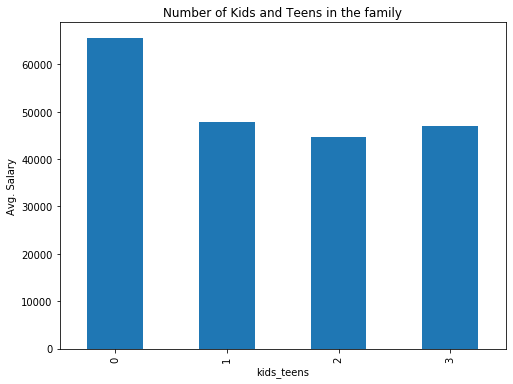

In [28]:
df.groupby(by='kids_teens')['Income'].mean().plot(kind='bar',figsize=(8,6))
plt.ylabel('Avg. Salary')
plt.title('Number of Kids and Teens in the family vs Avg. Salary')

###  Family with how many number of kids_teens accepted the most offer in each campaign?

##### Campaign 1

In [29]:
df[df['AcceptedCmp1']==1]['kids_teens'].count()

144

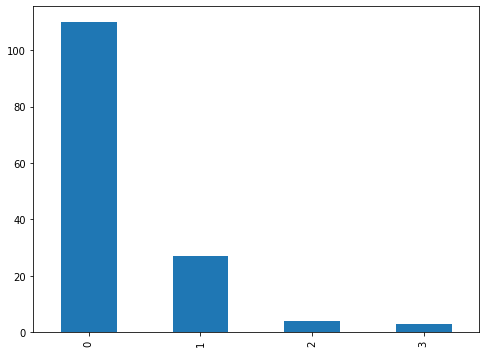

In [30]:
df[df['AcceptedCmp1']==1]['kids_teens'].value_counts().plot(kind='bar',figsize=(8,6))

##### Campaign 2

In [31]:
df[df['AcceptedCmp2']==1]['kids_teens'].count()

30

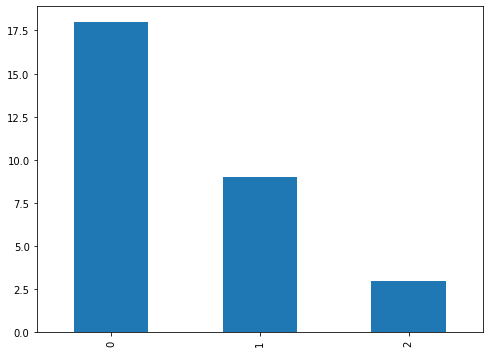

In [32]:
df[df['AcceptedCmp2']==1]['kids_teens'].value_counts().plot(kind='bar',figsize=(8,6))

##### Campaign 3

In [33]:
df[df['AcceptedCmp3']==1]['kids_teens'].count()

163

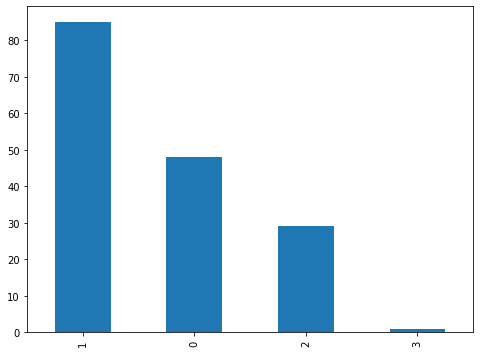

In [34]:
df[df['AcceptedCmp3']==1]['kids_teens'].value_counts().plot(kind='bar',figsize=(8,6))

##### Campaign 4

In [35]:
df[df['AcceptedCmp4']==1]['kids_teens'].count()

167

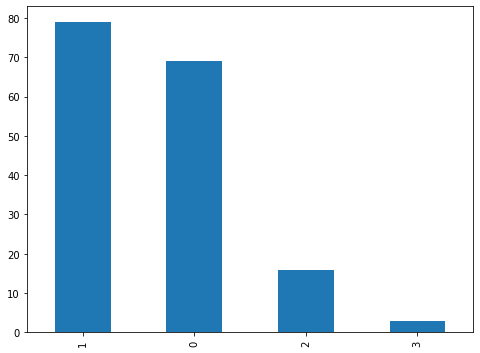

In [36]:
df[df['AcceptedCmp4']==1]['kids_teens'].value_counts().plot(kind='bar',figsize=(8,6))

##### Campaign 5

In [37]:
df[df['AcceptedCmp5']==1]['kids_teens'].count()

163

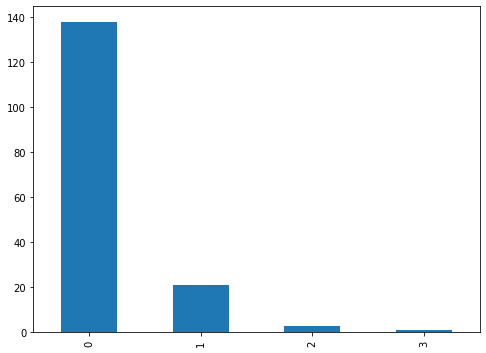

In [38]:
df[df['AcceptedCmp5']==1]['kids_teens'].value_counts().plot(kind='bar',figsize=(8,6))

In [39]:
df[df['Response']==1]['kids_teens'].count()

334

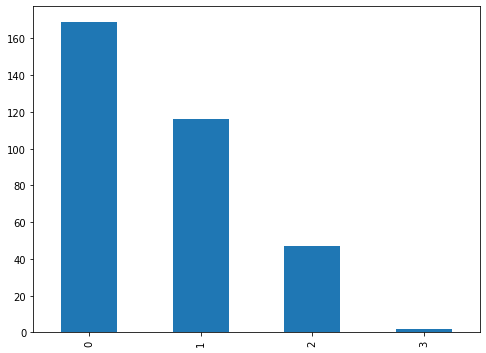

In [40]:
df[df['Response']==1]['kids_teens'].value_counts().plot(kind='bar',figsize=(8,6))

So, the family that consists of 0 or 1 kids_teens(Kids+teens) ordered the most and during the campaigns. And

Campaign 1- 144,
Campaign 2-  30,
Campaign 3- 163,
Campaign 4- 167,
Campaign 5- 163

Campaign 2 was the least successful campaign, while Campaign 4 & last campaign were the most successful.

Hence, Income is directly proportional to the number of orders.

### Grouping by Number of KIDS_TEENS

In [41]:
df.groupby(by='kids_teens')['MntWines','MntFishProducts','MntSweetProducts','MntFruits','MntMeatProducts','MntGoldProds'].mean()

C:\Users\ashis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,MntWines,MntFishProducts,MntSweetProducts,MntFruits,MntMeatProducts,MntGoldProds
kids_teens,,,,,,
0,487.305643,76.547022,53.061129,52.357367,372.609718,64.148903
1,267.040780,26.640957,20.295213,19.352837,98.628546,40.774823
2,141.591449,11.387173,8.370546,7.878860,51.299287,25.420428
3,171.377358,7.075472,6.622642,6.905660,64.018868,18.603774


### Grouping by MARITAL_STATUS

In [42]:
result=df.groupby(by='Marital_Status')['MntWines','MntFishProducts','MntSweetProducts','MntFruits','MntMeatProducts','MntGoldProds'].mean()
rowtotal = result.sum()
rowtotal.name = 'Total'
result.append(rowtotal)


C:\Users\ashis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,MntWines,MntFishProducts,MntSweetProducts,MntFruits,MntMeatProducts,MntGoldProds
Marital_Status,,,,,,
Absurd,355.500000,205.500000,30.500000,84.500000,312.500000,204.000000
Alone,184.666667,7.666667,7.000000,4.000000,26.333333,27.000000
Divorced,324.844828,35.043103,26.818966,27.426724,150.206897,46.288793
Married,299.480324,35.380787,26.701389,25.734954,160.681713,42.822917
Single,288.331250,38.216667,27.262500,26.835417,182.108333,43.729167
Together,306.825862,38.991379,26.122414,25.350000,168.103448,42.994828
Widow,369.272727,51.389610,39.012987,33.090909,189.285714,56.766234
YOLO,322.000000,4.000000,3.000000,3.000000,50.000000,42.000000
Total,2450.921658,416.188214,186.418255,229.938004,1239.219439,505.601938


On the basis of the above table, we could focus more on Creating ad-campaigns on Wines, Meat Products, & Gold Products Rather than focusing on everything.

In [43]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'kids_teens'],
      dtype='object')

In [44]:
df.groupby(by='AcceptedCmp1')['MntWines','MntFishProducts','MntSweetProducts','MntFruits','MntMeatProducts','MntGoldProds'].mean()

C:\Users\ashis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,MntWines,MntFishProducts,MntSweetProducts,MntFruits,MntMeatProducts,MntGoldProds
AcceptedCmp1,,,,,,
0,272.698950,33.792462,24.447042,24.272424,148.627863,41.747137
1,758.604167,91.861111,65.138889,55.847222,433.638889,77.131944


In [45]:
df.groupby(by='AcceptedCmp2')['MntWines','MntFishProducts','MntSweetProducts','MntFruits','MntMeatProducts','MntGoldProds'].mean()

C:\Users\ashis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,MntWines,MntFishProducts,MntSweetProducts,MntFruits,MntMeatProducts,MntGoldProds
AcceptedCmp2,,,,,,
0,295.862443,37.509050,27.014932,26.347511,165.818552,43.7181
1,898.666667,38.733333,30.600000,22.966667,250.300000,66.4000


In [46]:
df.groupby(by='AcceptedCmp3')['MntWines','MntFishProducts','MntSweetProducts','MntFruits','MntMeatProducts','MntGoldProds'].mean()

C:\Users\ashis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,MntWines,MntFishProducts,MntSweetProducts,MntFruits,MntMeatProducts,MntGoldProds
AcceptedCmp3,,,,,,
0,298.071738,37.519981,27.045258,26.138180,165.794896,42.223399
1,378.656442,37.595092,27.288344,28.392638,181.668712,66.938650


In [47]:
df.groupby(by='AcceptedCmp4')['MntWines','MntFishProducts','MntSweetProducts','MntFruits','MntMeatProducts','MntGoldProds'].mean()

C:\Users\ashis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,MntWines,MntFishProducts,MntSweetProducts,MntFruits,MntMeatProducts,MntGoldProds
AcceptedCmp4,,,,,,
0,268.281235,37.264351,26.727448,26.187651,160.358418,43.692233
1,746.520958,40.766467,31.227545,27.724551,248.772455,48.113772


In [48]:
df.groupby(by='AcceptedCmp5')['MntWines','MntFishProducts','MntSweetProducts','MntFruits','MntMeatProducts','MntGoldProds'].mean()

C:\Users\ashis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,MntWines,MntFishProducts,MntSweetProducts,MntFruits,MntMeatProducts,MntGoldProds
AcceptedCmp5,,,,,,
0,259.380838,34.471834,24.061627,23.89793,143.321136,41.376986
1,871.668712,76.435583,65.306748,56.93865,468.036810,77.723926


#### Even if some people are not accepting our ad-campaigns, but they have contributed towards our revenue, hence we must focus on those products that are being sold the most.

In [49]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'kids_teens'],
      dtype='object')

In [50]:
result_2=df.groupby(by='Marital_Status')['NumWebPurchases','NumCatalogPurchases','NumStorePurchases'].sum()
rowtotal_2 = result_2.sum()
rowtotal_2.name = 'Total'
result_2.append(rowtotal_2)

C:\Users\ashis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Marital_Status,,,
Absurd,7,15,13
Alone,15,2,12
Divorced,1000,620,1350
Married,3532,2268,5055
Single,1859,1248,2707
Together,2367,1552,3327
Widow,356,256,494
YOLO,14,2,12
Total,9150,5963,12970


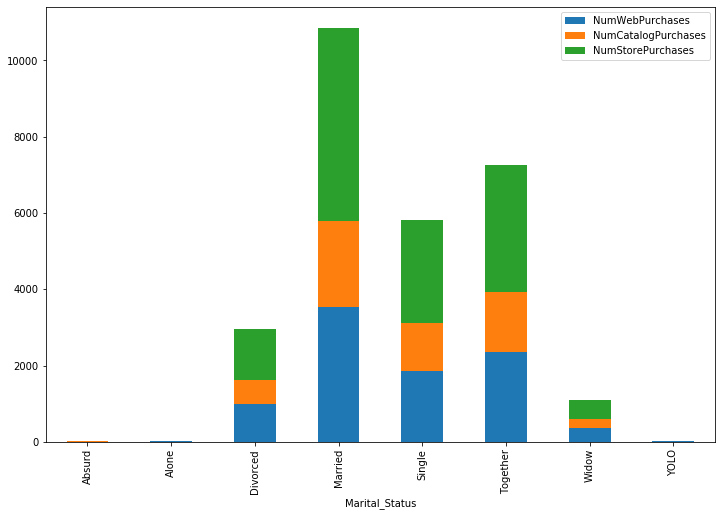

In [51]:
result_2.plot.bar(stacked=True,figsize=(12,8))

##### People are buying the least via Catalog and the most from other available options. 
##### So, we could say that our web and store services are used more often.
##### Hence, we should start focusing more on those two services.
##### Or else, we could provide more coupons on Catalog purchases to boost Catalog purchases.

##### ============================================================================

## Who has visited to the company's web site the most in the last 2 months.

In [52]:
df.groupby(by='Marital_Status')['NumWebVisitsMonth'].sum()

Marital_Status
Absurd         3
Alone         19
Divorced    1273
Married     4635
Single      2536
Together    3051
Widow        376
YOLO          16
Name: NumWebVisitsMonth, dtype: int64

In [53]:
rl=pd.DataFrame(df.groupby(by='Marital_Status')['NumWebVisitsMonth'].sum())

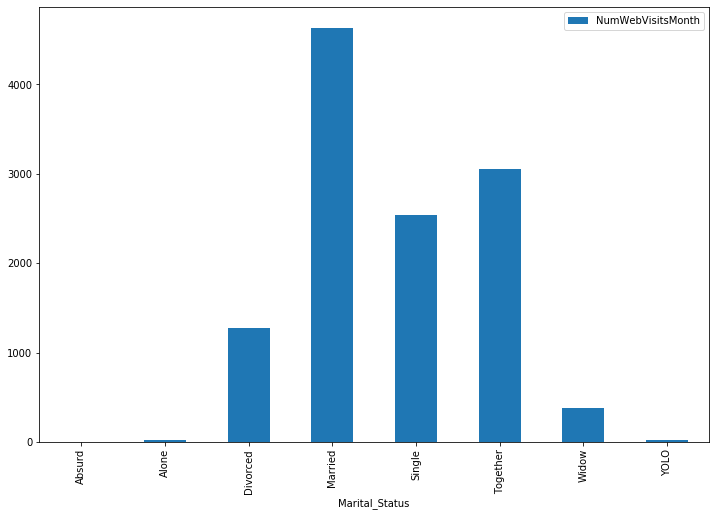

In [54]:
rl.plot(kind='bar',figsize=(12,8))

##### Married, Single and Together people have visited the company's website the most
##### To attract  Alone, YOLO, Divorced, and Widow people, we must give them coupons on the things that they buy the most. Like Meat, wine, etc

In [55]:
df.groupby(by='Marital_Status')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Absurd,2.0,53.000000,7.071068,48.0,50.50,53.0,55.50,58.0
Alone,3.0,30.333333,16.072751,12.0,24.50,37.0,39.50,42.0
Divorced,232.0,49.487069,28.728612,0.0,25.75,51.0,75.25,99.0
Married,864.0,48.277778,29.535832,0.0,22.75,48.0,73.25,99.0
Single,480.0,49.506250,28.632871,0.0,26.00,51.0,75.00,99.0
Together,580.0,50.106897,28.546099,0.0,26.00,51.0,75.00,99.0
Widow,77.0,49.142857,28.771657,0.0,28.00,48.0,75.00,99.0
YOLO,2.0,3.000000,0.000000,3.0,3.00,3.0,3.00,3.0


In [56]:
df['Age']=2020-df['Year_Birth']

In [57]:
df['Age'].mean()

51.19419642857143

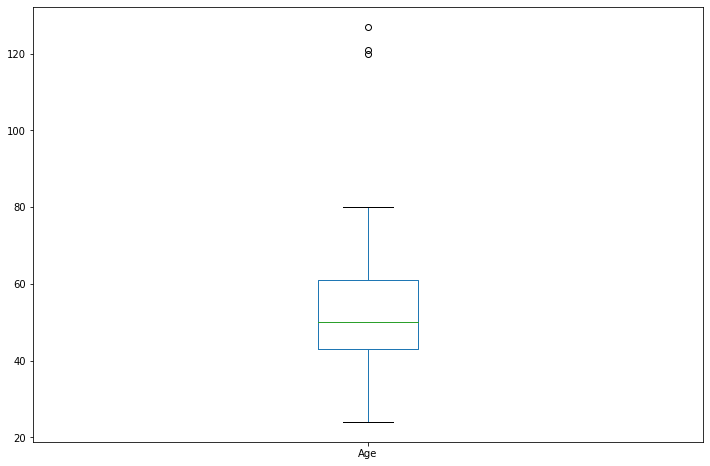

In [58]:
df['Age'].plot.box(figsize=(12,8))

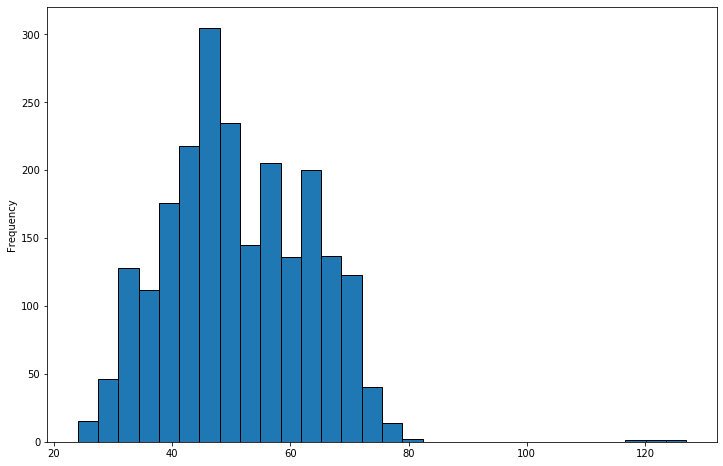

In [59]:
df['Age'].plot.hist(ec='black',bins=30, figsize=(12,8))

#### People b/w the age of 40 and 50 are important customers for us.
#### People over the age of 100 can be considered as outiers.
#### It depends upon us what we want to do with them i.e. keep them or remove them.
#### In this case, we are keeping them as we do not have a huge dataset, and moreover they could exist in reality.

In [60]:
df[df['Age']>100]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,kids_teens,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0,1,120
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0,1,127
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0,0,121


In [61]:
df2=df.copy()

In [62]:
df2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,kids_teens,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,63
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,66
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,55
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,36
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,39


In [63]:
df2.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [64]:
df2.shape

(2240, 31)

In [65]:
df3=df2.copy()

##### Removing not so important columns from the Dataset

In [66]:
df3.drop(['ID','Year_Birth','Kidhome','Teenhome','Dt_Customer'],axis=1,inplace=True)

In [67]:
df3.shape

(2240, 26)

### Converting Categorical variables into dummy variables

In [68]:
dummy_var=['Education','Marital_Status']
df3=pd.get_dummies(data=df3,columns=dummy_var,drop_first=True)

In [69]:
df3.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,kids_teens,Age,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,63,0,1,0,0,0,0,0,1,0,0,0
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,66,0,1,0,0,0,0,0,1,0,0,0
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,55,0,1,0,0,0,0,0,0,1,0,0
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,36,0,1,0,0,0,0,0,0,1,0,0
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,39,0,0,0,1,0,0,1,0,0,0,0


In [70]:
df['Marital_Status'].nunique()

8

In [71]:
df3.shape

(2240, 35)

###### Dummy variables Converted successfully

### K Means Clustering

In [72]:
from sklearn.cluster import KMeans

In [73]:
kmeans = KMeans(n_clusters=2)

In [74]:
kmeans.fit(df3.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'],axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [75]:
kmeans.cluster_centers_

array([[ 7.10193081e+04,  4.88366013e+01,  5.42770308e+02,
         4.68814192e+01,  3.05692810e+02,  6.55947712e+01,
         4.77086835e+01,  6.56629318e+01,  2.22689076e+00,
         5.47805789e+00,  4.57703081e+00,  8.06816060e+00,
         3.89449113e+00,  6.53594771e-03,  3.00000000e+00,
         1.10000000e+01,  1.89542484e-01,  6.90009337e-01,
         5.33716153e+01, -8.67361738e-17,  5.12605042e-01,
         1.61531279e-01,  2.49299720e-01,  9.33706816e-04,
         1.08309991e-01,  3.92156863e-01,  1.95144725e-01,
         2.61437908e-01,  4.01493931e-02,  2.92734587e-18],
       [ 3.50610470e+04,  4.93592814e+01,  8.51231822e+01,
         7.44824636e+00,  3.98383234e+01,  1.18092387e+01,
         8.14798973e+00,  2.41950385e+01,  2.41488452e+00,
         2.80838323e+00,  9.07613345e-01,  3.70316510e+00,
         6.61933276e+00,  1.19760479e-02,  3.00000000e+00,
         1.10000000e+01,  1.12061591e-01,  1.18905047e+00,
         4.91993157e+01,  4.61933276e-02,  4.94439692e-

In [76]:
def converter(cluster):
    if cluster==1:
        return 1
    else:
        return 0

In [77]:
df3['Cluster_1'] = df3['AcceptedCmp1'].apply(converter)

In [78]:
df3.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,kids_teens,Age,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Cluster_1
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,63,0,1,0,0,0,0,0,1,0,0,0,0
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,66,0,1,0,0,0,0,0,1,0,0,0,0
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,55,0,1,0,0,0,0,0,0,1,0,0,0
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,36,0,1,0,0,0,0,0,0,1,0,0,0
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,39,0,0,0,1,0,0,1,0,0,0,0,0


In [79]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df3['Cluster_1'],kmeans.labels_))
print(classification_report(df3['Cluster_1'],kmeans.labels_))

[[ 932 1164]
 [ 138    6]]
              precision    recall  f1-score   support

           0       0.87      0.44      0.59      2096
           1       0.01      0.04      0.01       144

    accuracy                           0.42      2240
   macro avg       0.44      0.24      0.30      2240
weighted avg       0.82      0.42      0.55      2240



## Classification Technique

In [80]:
df4=df3.copy()

In [81]:
df4.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,kids_teens,Age,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Cluster_1
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,63,0,1,0,0,0,0,0,1,0,0,0,0
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,66,0,1,0,0,0,0,0,1,0,0,0,0
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,55,0,1,0,0,0,0,0,0,1,0,0,0
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,36,0,1,0,0,0,0,0,0,1,0,0,0
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,39,0,0,0,1,0,0,1,0,0,0,0,0


In [82]:
X=df4.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Cluster_1'],axis=1)
y=df4['AcceptedCmp1']

In [83]:
X.shape

(2240, 30)

In [84]:
y.shape

(2240,)

### Splitting the dataset

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [87]:
X_train.shape

(1792, 30)

In [88]:
y_train.shape

(1792,)

In [89]:
X_test.shape

(448, 30)

In [90]:
y_test.shape

(448,)

### Standardization

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
sc_x=StandardScaler()

In [93]:
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

### 1. Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
log_model=LogisticRegression(max_iter=10000)

In [112]:
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
predictions=log_model.predict(X_test)

In [114]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [115]:
from sklearn.metrics import classification_report,confusion_matrix

In [116]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       419
           1       0.56      0.31      0.40        29

    accuracy                           0.94       448
   macro avg       0.76      0.65      0.68       448
weighted avg       0.93      0.94      0.93       448



### 2. Decision Tree

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [104]:
predictions_2 = dtree.predict(X_test)

In [105]:
print(classification_report(y_test,predictions_2))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       419
           1       0.48      0.52      0.50        29

    accuracy                           0.93       448
   macro avg       0.73      0.74      0.73       448
weighted avg       0.94      0.93      0.93       448



### 3. Random Forest Classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [108]:
predictions_3 = rfc.predict(X_test)

In [109]:
print(classification_report(y_test,predictions_3))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       419
           1       0.90      0.31      0.46        29

    accuracy                           0.95       448
   macro avg       0.93      0.65      0.72       448
weighted avg       0.95      0.95      0.94       448



In [120]:
df.to_csv('Dataset.csv',index=False)